In [32]:
import numpy as np 
from numpy.random import RandomState
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
import pandas as pd
%matplotlib inline

<b>Autoregressive (AR) Models of order p</b>

The first model we're going to consider, which forms the basis, is the Autoregressive model of order p, often shortened to AR(p).

Rationale

In the previous article we considered the random walk, where each term, xtxt is dependent solely upon the previous term, xt−1xt−1 and a stochastic white noise term, wtwt:

$$xt=xt−1+wt$$
$$xt=xt−1+wt$$
The autoregressive model is simply an extension of the random walk that includes terms further back in time. The structure of the model is linear, that is the model depends linearly on the previous terms, with coefficients for each term. This is where the "regressive" comes from in "autoregressive". It is essentially a regression model where the previous terms are the predictors.

Autoregressive Model of order p

A time series model, {xt}{xt}, is an autoregressive model of order pp, AR(p), if:

$$xt==α1xt−1+…+αpxt−p+wt∑i=1pαixt−i+wt$$
$$xt=α1xt−1+…+αpxt−p+wt=∑i=1pαixt−i+wt$$
Where {wt}{wt} is white noise and αi∈ℝαi∈R, with αp≠0αp≠0 for a pp-order autoregressive process.

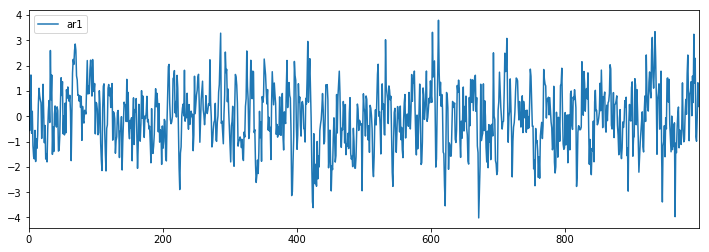

In [33]:
prng = RandomState(123455689)
# A discrete white noise of size 1000
dwn = prng.randn(1000)
# Generate our own AR(1)
ar1 = prng.randn(1000)
for t in range(1,1000):
    ar1[t] = 0.6 * ar1[t-1] + dwn[t]
    
df = pd.DataFrame({'ar1':ar1})
df.plot(figsize=(12,4))

In [34]:
def plot_acf_pcf(arr):
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(211)
    # Plot autocorrelation 
    fig = sm.graphics.tsa.plot_acf(arr, lags=40, ax=ax1)
    # Plot Partial Auto Correlation 
    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(arr, lags=40, ax=ax2)

'\nNotice exponential decay in autocorrelation\nAR(p) process and long memory deacy for auto correlation\nBut it doesnt take into account the latest shocks in the process.\nWe will see this later in MA(q) process where recent shocks account for the model at time t\n'

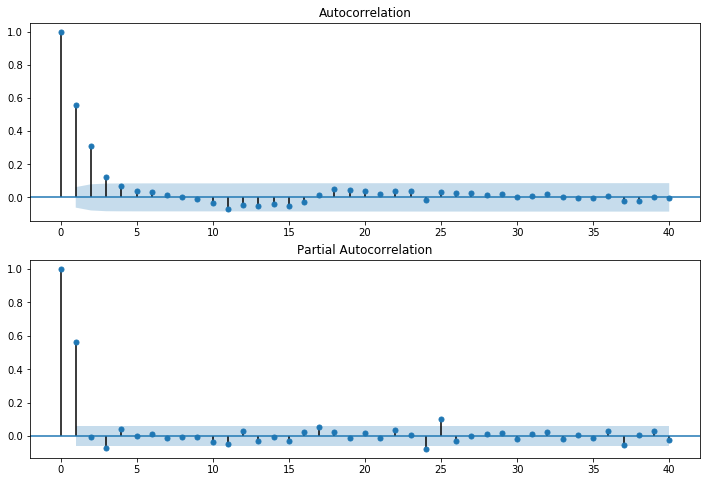

In [35]:
plot_acf_pcf(ar1)

"""
Notice exponential decay in autocorrelation
AR(p) process and long memory deacy for auto correlation
But it doesnt take into account the latest shocks in the process.
We will see this later in MA(q) process where recent shocks account for the model at time t
"""

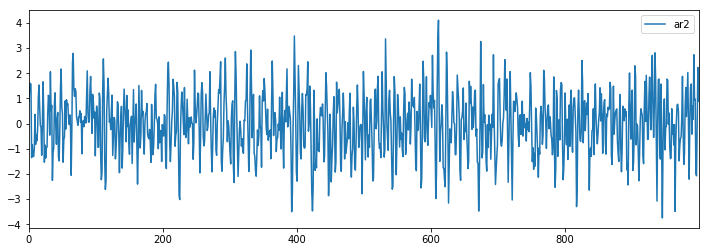

In [36]:
# Generate our own AR(2)
ar2 = prng.randn(1000)
for t in range(2,1000):
    ar2[t] = -0.4 * ar2[t-2] + 0.6 * ar2[t-1] + dwn[t]
    
df = pd.DataFrame({'ar2':ar2})
df.plot(figsize=(12,4))

'\nNotice negative auto correlation for the the 3rd lag(t-2) \nbecause we generated the series using negative co-efficient for lag2\nPACF clearly show a corelation till lag3.\nAfter we dont have any statiscally significant correlation\n'

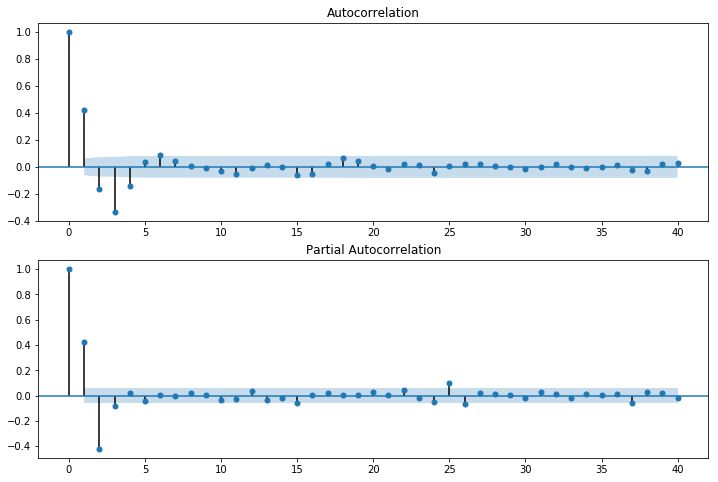

In [37]:
plot_acf_pcf(ar2)

"""
Notice negative auto correlation for the the 3rd lag(t-2) 
because we generated the series using negative co-efficient for lag2
PACF clearly show a corelation till lag3.
After we dont have any statiscally significant correlation
"""

In [38]:
# We try to fit ARMA(2,0), 2 autoregressive terms and now moving average 
arma_mod20 = sm.tsa.ARMA(ar2, (2,0)).fit()
print arma_mod20.params

[-0.01489033  0.60056642 -0.42107698]


In [39]:
# We now calculate the Akaike Information Criterion (AIC), 
# Schwarz Bayesian Information Criterion (BIC), and Hannan-Quinn Information Criterion (HQIC). 
# Our goalis to choose a model that minimizes (AIC, BIC, HQIC).
print arma_mod20.aic, arma_mod20.bic, arma_mod20.hqic

2833.44367338 2853.07469449 2840.90483125


In [40]:
arma_mod20.pvalues

array([  6.97534155e-01,   5.21942869e-81,   3.09819750e-44])

In [41]:
"""
 We will use the Durbin-Watson test for autocorrelation. 
 The Durbin-Watson statistic ranges in value from 0 to 4.
 A value near 2 indicates non-autocorrelation; a value toward 0 indicates positive autocorrelation; 
 a value toward 4 indicates negative autocorrelation.
"""
sm.stats.durbin_watson(arma_mod20.resid)

2.0644343408630395

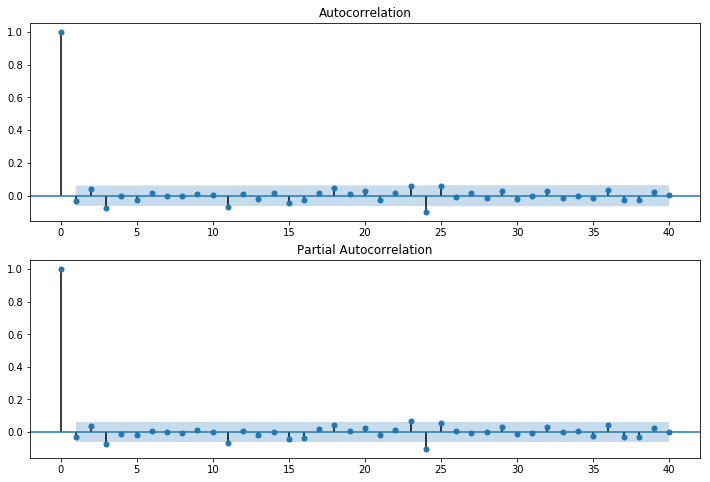

In [42]:
plot_acf_pcf(arma_mod20.resid)

# For good fit we expect it to be a cologram of white noise 

<b>Moving Average (MA) Models of order q</b>

Rationale

A Moving Average model is similar to an Autoregressive model, except that instead of being a linear combination of past time series values, it is a linear combination of the past white noise terms.

Intuitively, this means that the MA model sees such random white noise "shocks" directly at each current value of the model. This is in contrast to an AR(p) model, where the white noise "shocks" are only seen indirectly, via regression onto previous terms of the series.

A key difference is that the MA model will only ever see the last qq shocks for any particular MA(q) model, whereas the AR(p) model will take all prior shocks into account, albeit in a decreasingly weak manner.

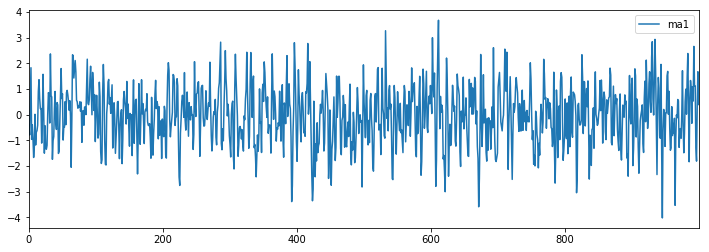

In [43]:
# Generate our own MA(1)
ma1 = prng.randn(1000)
for t in range(1,1000):
    ma1[t] = dwn[t] + 0.6 * dwn[t-1]
    
df = pd.DataFrame({'ma1':ma1})
df.plot(figsize=(12,4))

"\nMA(q) process doesnt show any deacay of auto correlation there is no long memory deacy in the process.\nIt capaturs the latest shocks in the system till lag q. \nIt can't alone model financial data since it doesnt account for memory lag \nWe will use a mix of both AR(p) and MA(q) later to model such timeseries\nPartial autocorrelation shows slight deacy which is different than what we saw in AR process.\n"

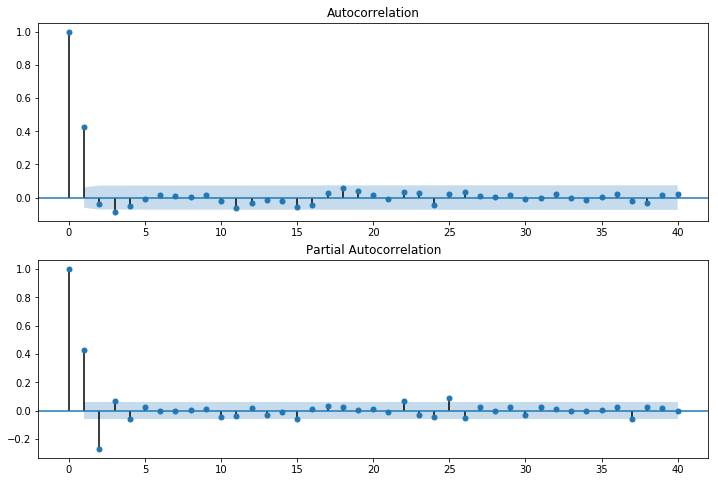

In [44]:
plot_acf_pcf(ma1)

"""
MA(q) process doesnt show any deacay of auto correlation there is no long memory deacy in the process.
It capaturs the latest shocks in the system till lag q. 
It can't alone model financial data since it doesnt account for memory lag 
We will use a mix of both AR(p) and MA(q) later to model such timeseries
Partial autocorrelation shows slight deacy which is different than what we saw in AR process.
"""

In [45]:
# We try to fit ARMA(0,1), 0 autoregressive terms and 1 moving average 
arma_mod01 = sm.tsa.ARMA(ma1, (0,1)).fit()
print arma_mod01.params
print arma_mod01.pvalues

[-0.02296616  0.55489088]
[  6.37692633e-01   3.22591098e-88]


In [46]:
"""
 We will use the Durbin-Watson test for autocorrelation. 
 The Durbin-Watson statistic ranges in value from 0 to 4.
 A value near 2 indicates non-autocorrelation; a value toward 0 indicates positive autocorrelation; 
 a value toward 4 indicates negative autocorrelation.
"""
sm.stats.durbin_watson(arma_mod01.resid)

1.9704029331071455

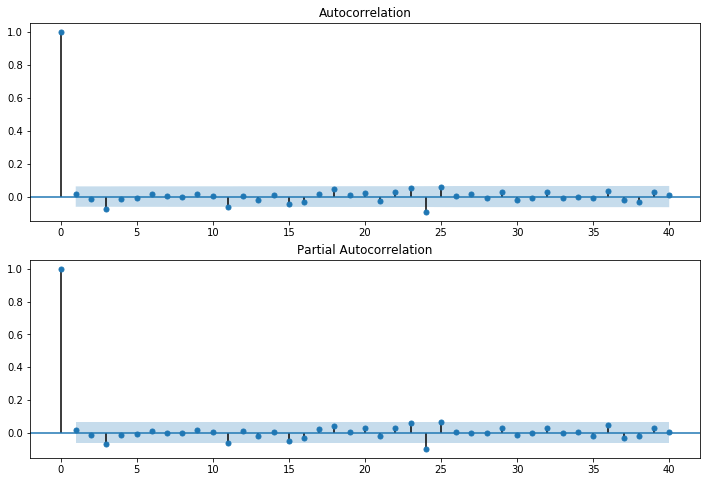

In [47]:
plot_acf_pcf(arma_mod01.resid)